# Predicting house prices
Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

taiwan_real_estate is available. The fitted linear regression model of house price versus number of convenience stores is available as mdl_price_vs_conv. For future exercises, when a model is available, it will also be fitted.


* Import the numpy package using the alias np.
* Create a DataFrame of explanatory data, where the number of convenience stores, n_convenience, takes the integer values from zero to ten.
* Print explanatory_data.






In [2]:
import pandas as pd 

taiwan_real_estate = pd.read_csv("/kaggle/input/taiwan-real-estate-prices-and-features-dataset/realestate.csv")
taiwan_real_estate.head()


,No,TransactionDate,HouseAge,DistanceToMRT,NumberConvenienceStores,Latitude,Longitude,PriceOfUnitArea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Import numpy with alias np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [4]:
# Import the ols function
from statsmodels.formula.api import ols


# Create the model object
mdl_price_vs_conv = ols("PriceOfUnitArea ~ NumberConvenienceStores", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept                  27.181105
NumberConvenienceStores     2.637653
dtype: float64


* Use the model mdl_price_vs_conv to make predictions from explanatory_data and store it as price_twd_msq.
* Print the prediction

In [5]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'NumberConvenienceStores': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

0     27.181105
1     29.818758
2     32.456412
3     35.094065
4     37.731719
5     40.369372
6     43.007026
7     45.644679
8     48.282332
9     50.919986
10    53.557639
dtype: float64


In [6]:
# Create a DataFrame of predictions named prediction_data. Start with explanatory_data, then add an extra column, price_twd_msq, containing the predictions you created in the previous step.

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    NumberConvenienceStores  price_twd_msq
0                         0      27.181105
1                         1      29.818758
2                         2      32.456412
3                         3      35.094065
4                         4      37.731719
5                         5      40.369372
6                         6      43.007026
7                         7      45.644679
8                         8      48.282332
9                         9      50.919986
10                       10      53.557639


### Visualizing predictions
The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

prediction_data is available. The code for the plot you created using sns.regplot() in Chapter 1 is shown.


* Create a new figure to plot multiple layers.
* Extend the plotting code to add points for the predictions in prediction_data. Color the points red.
* Display the layered plot.

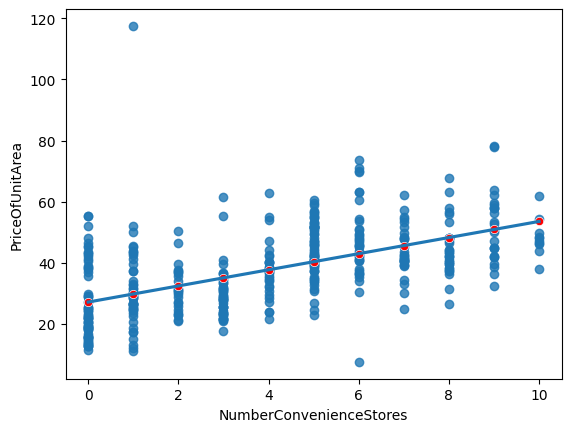

In [7]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="NumberConvenienceStores",
            y="PriceOfUnitArea",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="NumberConvenienceStores",
            y="price_twd_msq",
            data=prediction_data,
            color ="red")

# Show the layered plot
plt.show()

Legendary limit detection! Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

# Extracting model elements
The model object created by ols() contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

mdl_price_vs_conv is available.


* Print the parameters of mdl_price_vs_conv.
* Print the fitted values of mdl_price_vs_conv.
* Print the residuals of mdl_price_vs_conv.
* Print a summary of mdl_price_vs_conv.



In [8]:
# Import the ols function
from statsmodels.formula.api import ols


# Create the model object
mdl_price_vs_conv = ols("PriceOfUnitArea ~ NumberConvenienceStores", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept                  27.181105
NumberConvenienceStores     2.637653
dtype: float64


In [9]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

0     -15.657639
1      -8.719986
2       6.930628
3      14.430628
4       2.730628
         ...    
409   -11.781105
410    -0.919986
411    -5.044679
412    12.130628
413    12.980014
Length: 414, dtype: float64


In [10]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

0      53.557639
1      50.919986
2      40.369372
3      40.369372
4      40.369372
         ...    
409    27.181105
410    50.919986
411    45.644679
412    40.369372
413    50.919986
Length: 414, dtype: float64


In [11]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:        PriceOfUnitArea   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           3.41e-37
Time:                        09:00:52   Log-Likelihood:                -1586.0
No. Observations:                 414   AIC:                             3176.
Df Residuals:                     412   BIC:                             3184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Manually predicting house prices
You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use .predict(), but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.



* Get the coefficients/parameters of mdl_price_vs_conv, assigning to coeffs.
* Get the intercept, which is the first element of coeffs, assigning to intercept.
* Get the slope, which is the second element of coeffs, assigning to slope.
* Manually predict price_twd_msq using the formula, specifying the intercept, slope, and explanatory_data.
* Run the code to compare your manually calculated predictions to the results from .predict().

In [12]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

print(coeffs)



Intercept                  27.181105
NumberConvenienceStores     2.637653
dtype: float64


In [13]:
# Get the intercept
intercept = coeffs["Intercept"]

# Get the slope
slope = coeffs["NumberConvenienceStores"]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    NumberConvenienceStores
0                 27.181105
1                 29.818758
2                 32.456412
3                 35.094065
4                 37.731719
5                 40.369372
6                 43.007026
7                 45.644679
8                 48.282332
9                 50.919986
10                53.557639
    NumberConvenienceStores  predictions_auto
0                 27.181105         27.181105
1                 29.818758         29.818758
2                 32.456412         32.456412
3                 35.094065         35.094065
4                 37.731719         37.731719
5                 40.369372         40.369372
6                 43.007026         43.007026
7                 45.644679         45.644679
8                 48.282332         48.282332
9                 50.919986         50.919986
10                53.557639         53.557639


# Plotting consecutive portfolio returns
Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The sp500_yearly_returns dataset contains three columns:

**variable	meaning**
* symbol	Stock ticker symbol uniquely identifying the company.
* return_2018	A measure of investment performance in 2018.
* return_2019	A measure of investment performance in 2019.
* A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

sp500_yearly_returns is available as a pandas DataFrame.


* Create a new figure, fig, to enable plot layering.
* Generate a line at y equals x. This has been done for you.
* Using sp500_yearly_returns, draw a scatter plot of return_2019 vs. return_2018 with a linear regression trend line, without a standard error ribbon.
* Set the axes so that the distances along the x and y axes look the same.

In [14]:
sp500_yearly_returns = pd.read_csv("/kaggle/input/sandp500/all_stocks_5yr.csv")
sp500_yearly_returns.head()




,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


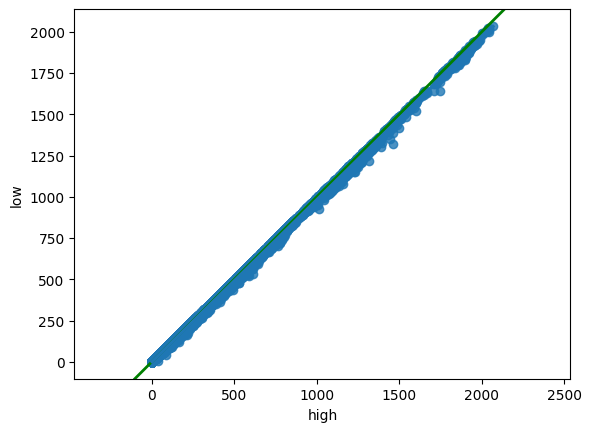

In [15]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="high", y="low", data= sp500_yearly_returns)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

## Modeling consecutive returns
Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

sp500_yearly_returns is available and ols() is loaded.


* Run a linear regression on return_2019 versus return_2018 using sp500_yearly_returns and fit the model. Assign to mdl_returns.
* Print the parameters of the model.



In [16]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("high ~ low", data= sp500_yearly_returns).fit()

# Print the parameters
mdl_returns.params

Intercept    0.081252
low          1.017518
dtype: float64

* Create a DataFrame named explanatory_data. Give it one column (return_2018) with 2018 returns set to a list containing -1, 0, and 1.
* Use mdl_returns to predict with explanatory_data in a print() call.

In [17]:
mdl_returns = ols("high ~ low", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'low': [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0   -0.936266
1    0.081252
2    1.098770
dtype: float64


# Transforming the explanatory variable
If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

taiwan_real_estate is available.


* Look at the plot.
* Add a new column to taiwan_real_estate called sqrt_dist_to_mrt_m that contains the square root of dist_to_mrt_m.
* Create the same scatter plot as the first one, but use the new transformed variable on the x-axis instead.
* Look at the new plot. Notice how the numbers on the x-axis have changed. This is a different line to what was shown before. Do the points track the line more closely?

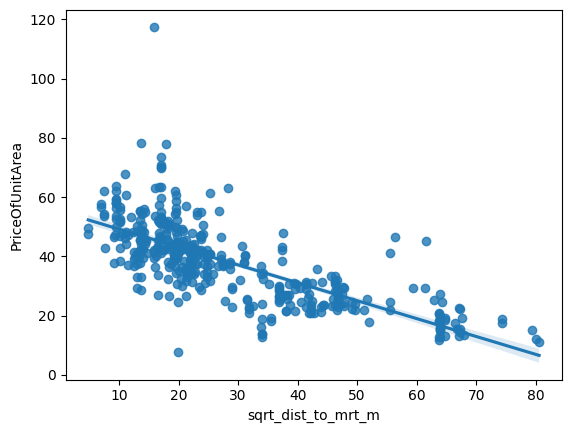

In [19]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["DistanceToMRT"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m", y= "PriceOfUnitArea", data = taiwan_real_estate)
plt.show()

In [20]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["DistanceToMRT"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("PriceOfUnitArea ~ sqrt_dist_to_mrt_m",data=taiwan_real_estate).fit()

# Print the parameters
mdl_price_vs_dist.params

Intercept             55.225885
sqrt_dist_to_mrt_m    -0.604296
dtype: float64

In [21]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "DistanceToMRT": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  DistanceToMRT  price_twd_msq
0                 0.0              0      55.225885
1                10.0            100      49.182929
2                20.0            400      43.139972
3                30.0            900      37.097016
4                40.0           1600      31.054060
5                50.0           2500      25.011103
6                60.0           3600      18.968147
7                70.0           4900      12.925190
8                80.0           6400       6.882234


ValueError: Could not interpret value `PriceOfUnitArea` for parameter `y`

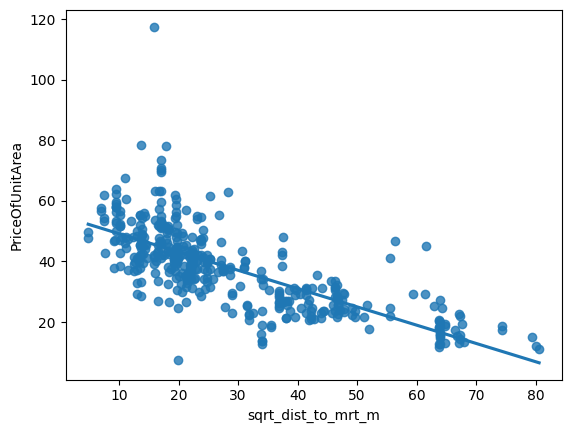

In [23]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["DistanceToMRT"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("PriceOfUnitArea ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "DistanceToMRT": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="PriceOfUnitArea", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data = prediction_data , x="sqrt_dist_to_mrt_m", y="PriceOfUnitArea", color="red")
plt.show()

# Transforming the response variable too
The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.


* Look at the plot.
* Create a qdrt_n_impressions column using n_impressions raised to the power of 0.25.
* Create a qdrt_n_clicks column using n_clicks raised to the power of 0.25.
* Create a regression plot using the transformed variables. Do the points track the line more closely?

In [ ]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data = ad_conversion)
plt.show()

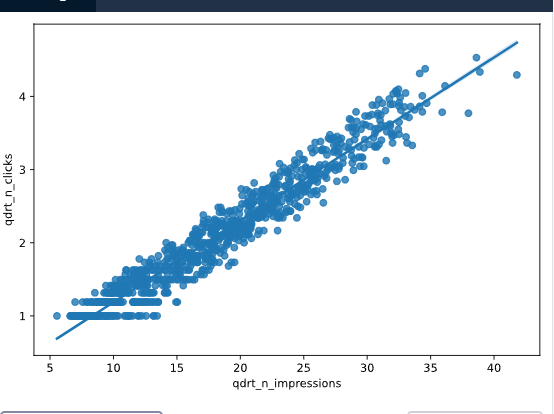

In [ ]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data = ad_conversion).fit()

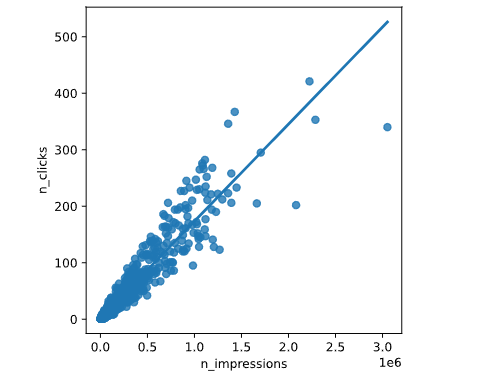

In [ ]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

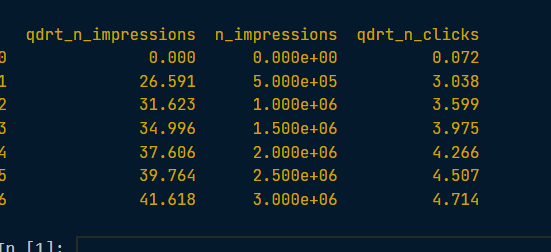

### Back transformation
In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.


* Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.

In [ ]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

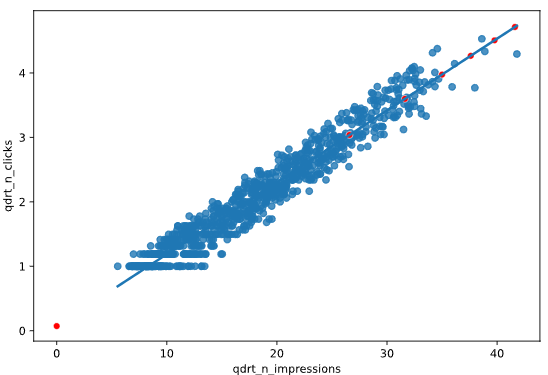

In [ ]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data = prediction_data,x ="qdrt_n_impressions", y="qdrt_n_clicks", color="red")
plt.show()

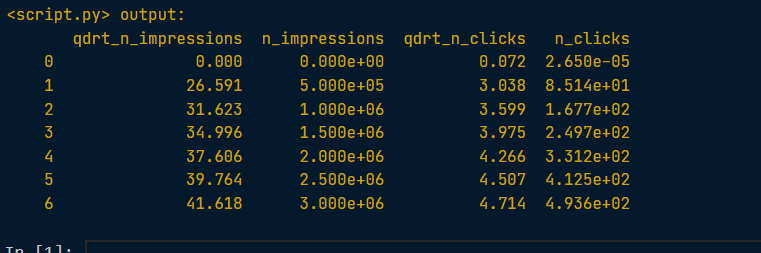